# Python RPM Example

## Problem Statement

You are given data for the tire rotations per minute in a file called `tire_rpm.csv` and are tasked with finding the max, min, mean, mode, and median speed of the vehicle. Bonus points for a graph!

----

To solve this problem, let's split it into steps and solve each issue one a time.

1. Read and parse the data from the .csv file
2. Convert the RPM data into vehicle speed
3. Find the max, min, mean, mode, and median

## Step 1: Read and parse the data

To begin, we will import the built-in csv library. This Python package makes it easy to parse data from csv files, and takes away the burden of writting code to split the data. We will also import the math library.

In [1]:
import csv
import math

We will start by creating an empy list for our rpm values to be stored in. Next we will open the .csv file and read it.

In [9]:
with open("tire_rpm_example.csv", "r") as file_contents:
    csv_reader = csv.reader(file_contents, delimiter=",")
    rpm = []
    for rpm_row in csv_reader:
        for rpm_value in rpm_row:
            rpm.append(int(rpm_value))

print(f"Tire RPM: {rpm}")

Tire RPM: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

Just like that, the data is parsed and we are ready for converting the rpm data to speed.

## Step 2: Converting RPM to vehicle speed

Now that we have a list of numbers, we can begin to do math with the values. Remember that these values are tire RPMs, not the speed of the car. So these values all need to be converted to speed. Let's look at the units to figure out how to convert RPM to mph.

    rotations/minute * ?? = miles/hour

    (minutes/hour) * (miles/rotation) = ??

We know there are 60 minutes per one hour, so we can substitute that value in, but we currently do not know how many miles we travel per one rotation of the wheel. The total distance traveled with one rotation would equal to the circumference of the tire. The formula for the circumference of a circle is 'π * d' where d is the diamter of the tire. Let's assume the diameter of the tire is 20". 

    π * 20 inches = 20π inches

But this number needs to be in miles, not inches. To convert from inches to miles, we divide by 63360 (thank you Google). This gives us:

    20π / 63360 miles = 0.000991 miles

Plugging this back into the equation gives us:

    60 minutes/hr * 0.000991 miles/rotation = 0.0595 (minutes/rotation)(miles/hr)

Finally, if we multiply our RPM value (say 1000rpm) with the conversion factor, we get:

    1000 (rotation/minute) * 0.0595 (minutes/rotation)(miles/hr) = 59.5 mph

With this conversion factor in hand, we can now convert all the values in our rpm list to speeds.

In [12]:
tire_diameter = 20                              # inch
tire_circumference = tire_diameter * math.pi    # inch
inches_to_miles = 1 / 63360                     # miles/inch
min_per_hour = 60                               # min/hr
conversion_factor = tire_circumference * inches_to_miles * min_per_hour

speed = []
for rpm_value in rpm:
    speed.append(rpm_value * conversion_factor)

print(f"Conversion factor: {conversion_factor:.4f}")
print(f"Speed data: {speed}")

Conversion factor: 0.0595
Speed data: [0.0, 0.059499860863443055, 0.11899972172688611, 0.17849958259032916, 0.23799944345377222, 0.2974993043172153, 0.35699916518065833, 0.4164990260441014, 0.47599888690754444, 0.5354987477709875, 0.5949986086344305, 0.6544984694978736, 0.7139983303613167, 0.7734981912247597, 0.8329980520882028, 0.8924979129516458, 0.9519977738150889, 1.0114976346785318, 1.070997495541975, 1.1304973564054182, 1.189997217268861, 1.249497078132304, 1.3089969389957472, 1.3684967998591904, 1.4279966607226333, 1.4874965215860763, 1.5469963824495194, 1.6064962433129626, 1.6659961041764055, 1.7254959650398485, 1.7849958259032916, 1.8444956867667348, 1.9039955476301778, 1.9634954084936207, 2.0229952693570636, 2.082495130220507, 2.14199499108395, 2.201494851947393, 2.2609947128108363, 2.3204945736742792, 2.379994434537722, 2.439494295401165, 2.498994156264608, 2.5584940171280515, 2.6179938779914944, 2.6774937388549374, 2.7369935997183807, 2.7964934605818237, 2.8559933214452666,

## Step 3: Finding the statistical properties of the data

With the speed values now acquired, lets find the maximum and minimum. These can be easily found using functions included with Python.

In [13]:
speed_max = max(speed)
speed_min = min(speed)
print(f"The max speed was {speed_max:.2f}mph.")
print(f"The min speed was {speed_min:.2f}mph.")

The max speed was 85.08mph.
The min speed was 0.00mph.


Next, lets find the mean, median, and mode of the data. To do this, we will use the statistics library that is included with Python.

In [5]:
import statistics

In [14]:
speed_mean = statistics.mean(speed)
speed_median = statistics.median(speed)
speed_mode = statistics.mode(speed)
print(f"The mean speed was {speed_mean:.2f}mph.")
print(f"The median speed was {speed_median:.2f}mph.")
print(f"The mode speed was {speed_mode:.2f}mph.")

The mean speed was 53.55mph.
The median speed was 57.42mph.
The mode speed was 85.08mph.


---
## Bonus Content

If we wanted to graph this data to see the speed of the car, we could do so using the matplotlib library. Fortunately, this package comes pre-installed with Anaconda's package of Python. Because of that, we can get straight into importing the `pyplot` module to begin graphing.

In [7]:
from matplotlib import pyplot

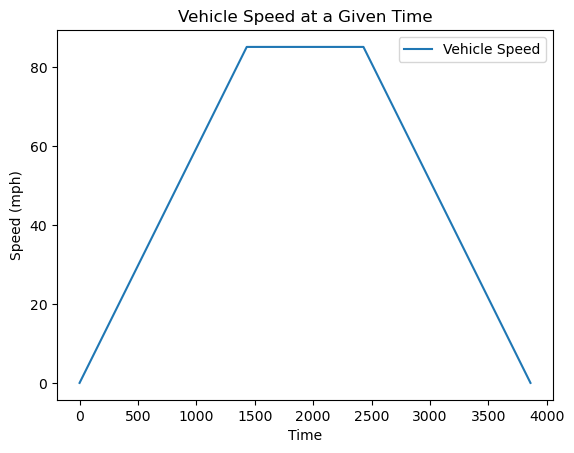

In [15]:
time = range(0, len(speed))

pyplot.plot(time, speed, label="Vehicle Speed")
pyplot.title("Vehicle Speed at a Given Time")
pyplot.xlabel("Time")
pyplot.ylabel("Speed (mph)")
pyplot.legend()
pyplot.show()